# perform an A/B Test for ad campaign using python 

<img src="files/ab-testing.png" width="200">

<div>Icons made by <a href="https://flat-icons.com/" title="Flat Icons">Flat Icons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>




<br>

### AB testing is essentially an experiment where two or more variants are evaluated by  statistical analysis to determine which variation performs better for a given conversion goal
<br>

### You are hired by a digital marketing agency that designed a new ad for their client and This ad is hosted on a website .They hired you to do an A/B test to advise them on whether they should go for the new ad or not .

## Task one : Load the dataset

In [32]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
np.random.seed(42)

In [4]:
#load the dataset
df = pd.read_excel("AB Test.xlsx")
df.head()

,group,action
0,experiment,view
1,control,view
2,control,view and click
3,control,view and click
4,control,view


In [5]:
#show the dataframe head
df.head()

,group,action
0,experiment,view
1,control,view
2,control,view and click
3,control,view and click
4,control,view


In [6]:
#show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   3757 non-null   object
 1   action  3757 non-null   object
dtypes: object(2)
memory usage: 58.8+ KB


# Task Two : Set up the hypothesis testing steps


In [7]:
#find insights in our data
df.group.value_counts()

experiment    1881
control       1876
Name: group, dtype: int64

In [8]:
#find insights in our data
df.action.value_counts()

view              3082
view and click     675
Name: action, dtype: int64

# Invariant Metrics Test

In [9]:
n_obs = df.shape[0]
n_control = df.group.value_counts()[1]

In [10]:
p=0.5
mean = n_obs * p 
std = n_obs * p * (1-p)

In [12]:
#Calculating z-score
z = ((n_control + 0.5) - mean) / std
z

-0.002129358530742614

In [14]:
print("Z score(test stat) is",z)
print("P-value",2 * stats.norm.cdf(z))

Z score(test stat) is -0.002129358530742614
P-value 0.9983010189878175


### experiment group : 
the group that is involved in the new experiment . i.e the group that received the new ad . 
### Control group : 
the 2nd group that didn't receive the new ad
### Click-through rate (CTR) : 
the number of clicks advertisers receive on their ads per number of impressions.


## Hypothesis Testing steps:

1) Specify the Null Hypothesis.
<br>
2) Specify the Alternative Hypothesis.
<br>
3) Set the Significance Level (a)
<br>
4) Calculate the  Corresponding P-Value.
<br>
5) Drawing a Conclusion



## Task Three : Compute the difference in the click-through rate 

In [26]:
# Get dataframe with all observations from control group 

# Compute CTR for control group 

#Display the CTR For the control group
ctr_control = df.loc[(df["group"]=="control") & (df["action"]=="view and click")].shape[0]/\
df.loc[(df["group"]=="control")].shape[0]

In [27]:
# Get dataframe with all records from experiment group 

# Compute click through rate for experiment group 

ctr_experiment = df.loc[(df["group"]=="experiment") & (df["action"]=="view and click")].shape[0]/\
df.loc[(df["group"]=="experiment")].shape[0]

In [29]:
#Compute the difference in the CTR 

#display the difference 
ctr_experiment - ctr_control

-0.027627583204959477

# Task four : create sample distribution using bootsrapping

## Bootstrapping : 
The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples.

Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once. This approach to sampling is called sampling with replacement.

## Example : 
Bootstrapping in statistics, means sampling with replacement.
so if we have a group of individuals and , and want to bootsrap sample of ten individuals from this group , we could randomly sample any ten individuals but with bootsrapping, we are sampling with replacement so we could actually end up sampling 7 out of the ten individuals and three of the previously selected individuals might end up being sampled again

<img src="files/Bootstrapping.png" width="600">

In [30]:
#bootsrapping

bootsrapped_differences = []

size = df.shape[0]

for _ in range(10000):
    sample = df.sample(size,replace=True)
    
    ctr_control = sample.loc[(sample["group"]=="control") & (sample["action"]=="view and click")].shape[0]/\
    sample.loc[(sample["group"]=="control")].shape[0]
    
    ctr_experiment = sample.loc[(sample["group"]=="experiment") & (sample["action"]=="view and click")].shape[0]/\
    sample.loc[(sample["group"]=="experiment")].shape[0]
    
    bootsrapped_differences.append(ctr_experiment - ctr_control)

# Task five : Evaluate the null hypothesis and draw conclustions.

### The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed.

<AxesSubplot:ylabel='Frequency'>

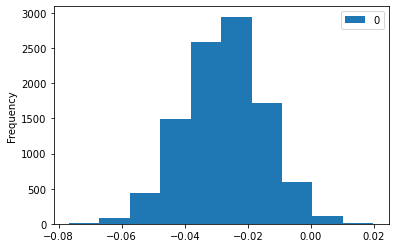

In [31]:
# Plot the sampling distribution 
pd.DataFrame(bootsrapped_differences).plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

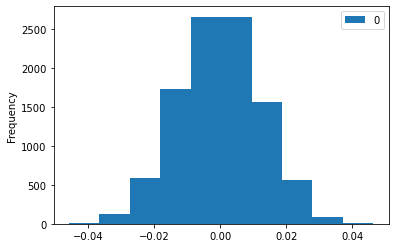

In [37]:
#simulate the distribution under the null hypothesis 

null_h = np.random.normal(0,pd.DataFrame(bootsrapped_differences).std(),len(bootsrapped_differences))
null_h
#plot the null distribution 

pd.DataFrame(null_h).plot(kind="hist")

###  The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

### The confidence level is equivalent to 1 – the alpha level. So, if your significance level is 0.05, the corresponding confidence level is 95%.

###  i.e for P Value less than 0.05 we are 95% percent confident that we can reject the null hypothesis 

In [38]:
# Compute the  P-value 
null_h = pd.DataFrame(null_h)
bootsrapped_differences = pd.DataFrame(bootsrapped_differences)
print(null_h.shape,bootsrapped_differences.shape)

(10000, 1) (10000, 1)


In [41]:
p_val = (null_h>bootsrapped_differences).mean()
p_val

0    0.9428
dtype: float64